## **Python Data Analysis Project - Blinkit Analysis (Retail Data Exploration & KPI Tracking )**

## **Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Dataset**

In [6]:
df = pd.read_csv("blinkit_data.csv")

## **Sample Data**

In [8]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## **Size Of Dataset**

In [10]:
df.shape

(8523, 12)

## **Information about Dataset**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Statistics About Dataset**

In [14]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## **Check For Null Values**

In [16]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

## **Check For Duplicate Data**

In [18]:
df.duplicated().sum()

0

## **Perform Data Cleaning**

In [20]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'reg' : 'Regular',
    'LF' : 'Low Fat',
    'low fat' : 'Low Fat'
})

In [22]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

## **Business Requiremnets**

## **Key Performance Indicator's (KPI's) Requiremnets**

## Total Sales

In [55]:
df['Sales'].sum()

1201681.4808

## Average Sales


In [29]:
df['Sales'].mean()

140.9927819781767

## Number Of Items Sold

In [31]:
df['Sales'].count()

8523

## Average rating

In [33]:
df['Rating'].mean()

3.965857092573038

## **Charts Requirements**

## Total Sales by Fat Content

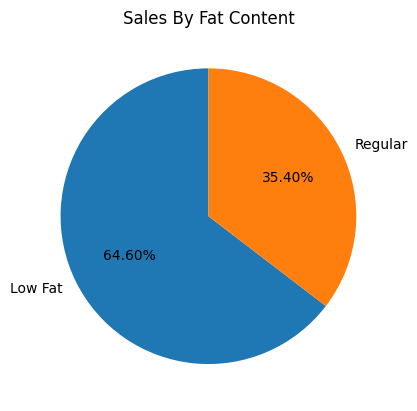

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64

In [79]:
sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat_content, labels = sales_by_fat_content.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Sales By Fat Content')
plt.show()
sales_by_fat_content

## Total sale by Item type

In [110]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).reset_index()

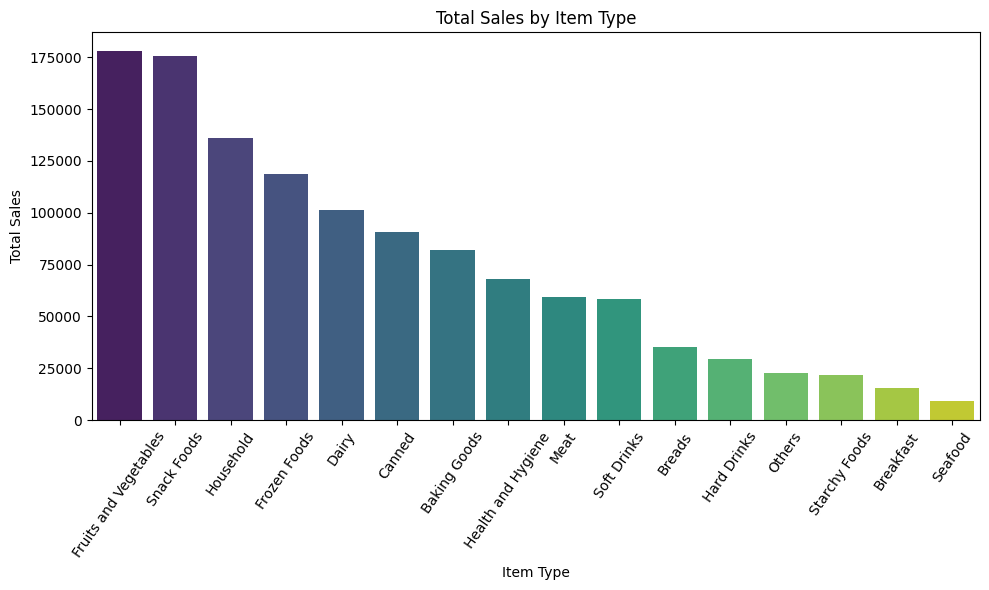

In [122]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Sales', data=sales_by_item_type, palette='viridis')
#ax.bar_label(ax.containers[0])
plt.xticks(rotation=55)
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [120]:
sales_by_item_type

,Item Type,Sales
0,Fruits and Vegetables,178124.0810
1,Snack Foods,175433.9204
2,Household,135976.5254
3,Frozen Foods,118558.8814
4,Dairy,101276.4596
5,Canned,90706.7270
6,Baking Goods,81894.7364
7,Health and Hygiene,68025.8388
8,Meat,59449.8638
9,Soft Drinks,58514.1650


## Fat Content by Outlet for Total Sales

In [127]:
group = df.groupby(['Item Fat Content', 'Outlet Location Type'])['Sales'].sum().reset_index()

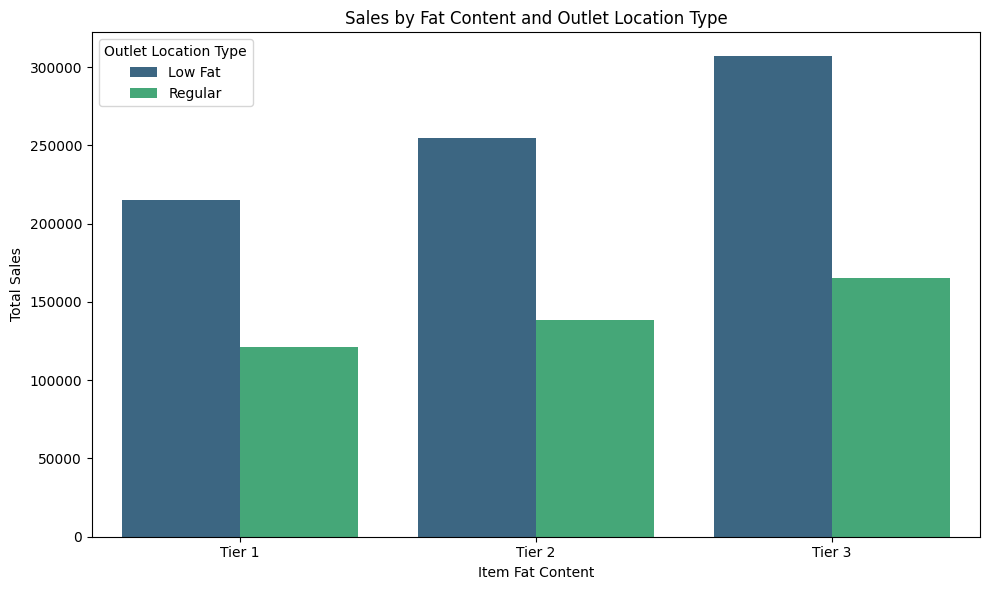

In [133]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group, x='Outlet Location Type', y='Sales', hue='Item Fat Content', palette='viridis')

plt.title('Sales by Fat Content and Outlet Location Type')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.legend(title='Outlet Location Type')
plt.tight_layout()
plt.show()

## Total Sales by Outlet Establishment

In [146]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
sales_by_year

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64

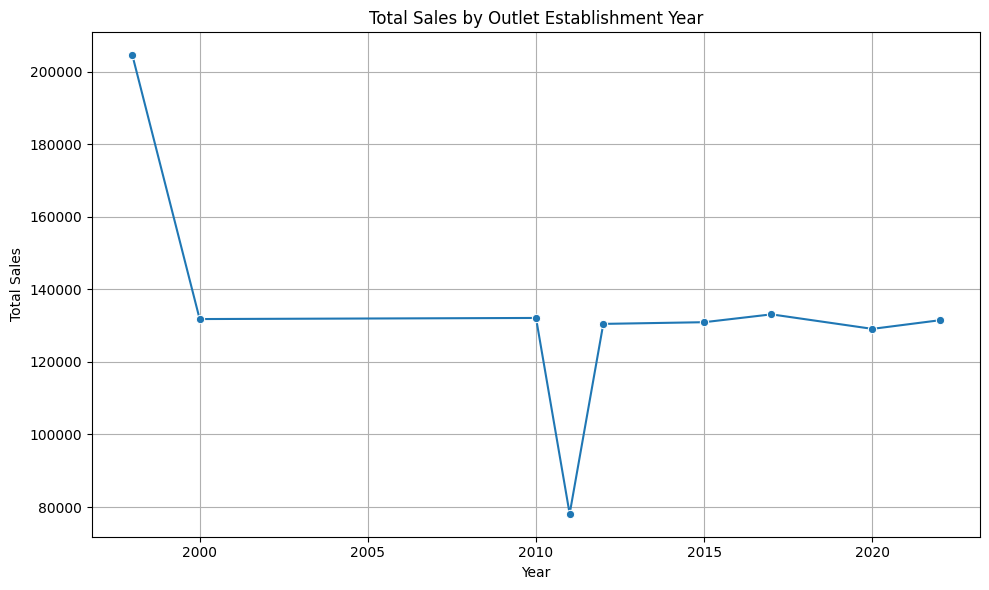

In [144]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='o')

plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

## Sales by Outlet Size

In [153]:
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum().reset_index()
sales_by_outlet_size

,Outlet Size,Sales
0,High,248991.5840
1,Medium,507895.7284
2,Small,444794.1684


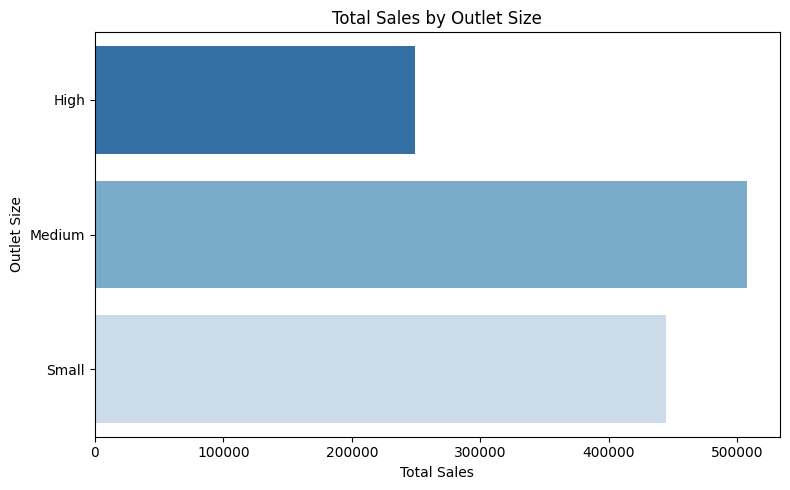

In [157]:

plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_outlet_size, x='Sales', y='Outlet Size', palette='Blues_r')

plt.title('Total Sales by Outlet Size')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Size')
plt.tight_layout()
plt.show()


## Sales by Outlet Location

In [172]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False).reset_index()


In [174]:
sales_by_location

,Outlet Location Type,Sales
0,Tier 3,472133.0272
1,Tier 2,393150.6416
2,Tier 1,336397.8120


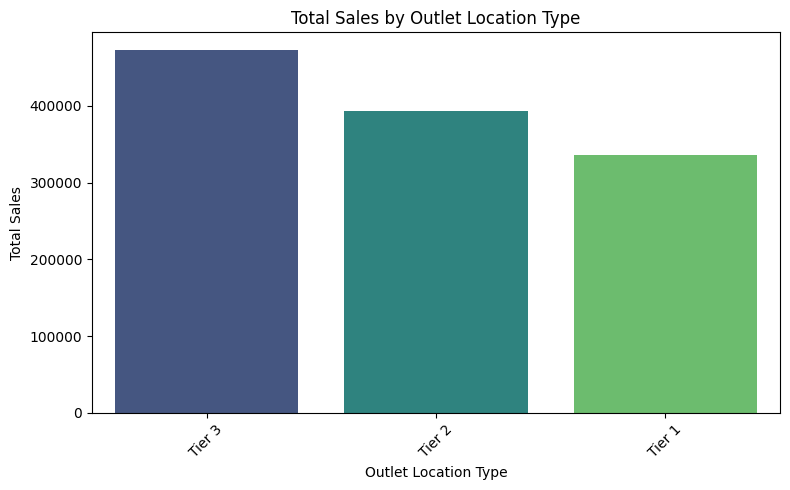

In [176]:
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_location, x='Outlet Location Type', y='Sales', palette='viridis')

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()